### Урок 3. Классификация. Логистическая регрессия

In [293]:
import numpy as np
import matplotlib.pyplot as plt

In [294]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2,  1, 3, 3, 1, 2]], dtype = np.float64)
y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [295]:
X

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 5.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [296]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [297]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [298]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])

In [299]:
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  2.        ,  5.        ,  3.        ,
         0.        ,  5.        , 10.        ,  1.        ,  2.        ],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  2.        ,
         1.        ,  3.        ,  3.        ,  1.        ,  2.        ]])

### Задание 1
Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [300]:
# def calc_logloss(y, y_pred):
#     err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
#     err = np.sum(err)
#     return err

In [301]:
# Новая функция:
def calc_logloss(y, y_pred):
    err = 0
    for i in range(len(y)):
        if y_pred[i] == 0:
            err += (1.0 - y[i]) * np.log(1.0 - y_pred[i])
        elif y_pred[i] == 1:
            err += y[i] * np.log(y_pred[i])
        else:
            err += y[i] * np.log(y_pred[i]) + (1.0 - y[i]) * np.log(1.0 - y_pred[i])
    return - err / len(y)

In [302]:
# Пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([0.9, 0.1])
calc_logloss(y1, y_pred1)

0.10536051565782628

In [303]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [304]:
z = np.linspace(-10, 10, 101)

In [305]:
probabilities = sigmoid(z)

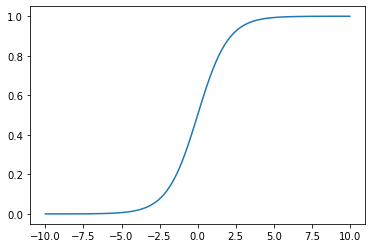

In [306]:
plt.plot(z, probabilities)
plt.show()

### Задание 2
Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

Logistic Regression

In [307]:
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

Подбор параметров вручную. Если увеличивать значение alpha, то получаем слишком большие значения весов, хотя ошибка уменьшается и стремится к нулю. Модель явно переобучается. Поэтому остановилась на alpha=0.2 и числе итераций 10000.

In [308]:
W = eval_model(X_st, y, iterations=10000, alpha=0.2)

1000 [-4.27750051 -0.9816614  -0.27448097  4.26265815] 0.32668405359656566
2000 [-6.58615519 -1.08575519 -1.09119709  5.89881304] 0.28254192283566193
3000 [-8.22385533 -1.19156936 -1.63000041  7.14370039] 0.2597595172566012
4000 [-9.56704975 -1.29089433 -2.0557678   8.19667204] 0.24420638347830756
5000 [-10.74514777  -1.38402169  -2.42100695   9.13458005] 0.2321445928781046
6000 [-11.81433203  -1.47181149  -2.74763502   9.99297564] 0.22216551620154043
7000 [-12.80329734  -1.55496555  -3.046576    10.79084996] 0.21360640206756903
8000 [-13.72863234  -1.63401847  -3.3240288   11.53959677] 0.20610284579182
9000 [-14.60094036  -1.70938852  -3.58389036  12.24673974] 0.19942964927528775
10000 [-15.42758101  -1.78141575  -3.82882239  12.91765126] 0.19343467758961289


### Задание 3
Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1. На вход подаётся W, который уже посчитан функцией eval_model, и X, на выходе — массив y_pred_proba.

In [309]:
def calc_pred_proba(W, X):
    z = np.dot(W, X)
    return sigmoid(z)

In [310]:
calc_pred_proba(W, X_st)

array([3.68031607e-01, 1.07177437e-01, 9.99819847e-01, 2.12586426e-04,
       7.87981206e-01, 2.44511514e-01, 9.99965441e-01, 7.02832514e-02,
       4.63598848e-01, 9.98704401e-01])

### Задание 4
Создайте функцию calc_pred, возвращающую предсказанный класс. На вход подаётся W, который уже посчитан функцией eval_model, и X, на выходе — массив y_pred.

In [311]:
A = calc_pred_proba(W, X_st)
A

array([3.68031607e-01, 1.07177437e-01, 9.99819847e-01, 2.12586426e-04,
       7.87981206e-01, 2.44511514e-01, 9.99965441e-01, 7.02832514e-02,
       4.63598848e-01, 9.98704401e-01])

In [312]:
def calc_pred(W, X):
    m = X.shape[1]
    y_pred = np.zeros(m)
    A = calc_pred_proba(W, X)
    # За порог отнесения к тому или иному классу примем вероятность 0.5
    for i in range(A.shape[0]):
        if A[i] >= 0.5:
            y_pred[i] = 1
        elif A[i] <0.5:
            y_pred[i] = 0
    return y_pred 

In [313]:
y_pred = calc_pred(W, X_st)
y_pred

array([0., 0., 1., 0., 1., 0., 1., 0., 0., 1.])

In [314]:
print(f'True:{y}')
print(f'Pred:{y_pred}')

True:[0. 0. 1. 0. 1. 0. 1. 0. 1. 1.]
Pred:[0. 0. 1. 0. 1. 0. 1. 0. 0. 1.]


### Задание 5
Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

In [315]:
def accuracy(y, y_pred):
    acc = np.mean(y == y_pred)
    return acc

In [316]:
accuracy(y, y_pred)

0.9

Матрица ошибок:

In [317]:
# TP  FP
# FN  TN

In [318]:
def matrix_err(y, y_pred):
    m_e = np.zeros((2, 2))
    for i in range (len(y)):
        if y[i] == y_pred[i] == 1:
            m_e[0][0] += 1
        elif y[i] == y_pred[i] == 0:
            m_e[1][1] += 1
        elif y[i]!=y_pred[i] and y[i]==1:
            m_e[1][0] += 1
        elif y[i]!= y_pred[i] and y[i]==0:
            m_e[0][1] +=1
    return m_e

In [319]:
m_e = matrix_err(y, y_pred)
m_e

array([[4., 0.],
       [1., 5.]])

Точность (precision):

In [320]:
def precision_recall(y, y_pred):
    m_e = matrix_err(y, y_pred)
    tp = m_e[0][0]
    tn = m_e[1][0]
    fp = m_e[0][1]
    fn = m_e[1][0]
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    return precision, recall

In [321]:
precision, recall = precision_recall(y, y_pred)
print(precision)
print(recall)

1.0
0.8


In [322]:
f1 = 2*precision*recall/(precision + recall)
f1

0.888888888888889

Проверка:

In [323]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


print(f'accuracy {accuracy_score(y, y_pred)}')
print(f'precision {precision_score(y, y_pred)}')
print(f'recall {recall_score(y, y_pred)}')
print(f'f-score {f1_score(y, y_pred)}')
print(f'\n {confusion_matrix(y, y_pred)}')

accuracy 0.9
precision 1.0
recall 0.8
f-score 0.888888888888889

 [[5 0]
 [1 4]]


### Задание 6
Могла ли модель переобучиться? Почему?

Да, могла. Это может быть связано с большим числом итераций, при отсутствии ошибок при обучении, также высокие значения весов могут быть признаком переобучения модели. В идеале надо было бы еще разделить выборки на train и test, для объективности.